# <font style="color:blue">Project 2: Kaggle Competition - Classification</font>

#### Maximum Points: 100

<div>
    <table>
        <tr><td><h3>Sr. no.</h3></td> <td><h3>Section</h3></td> <td><h3>Points</h3></td> </tr>
        <tr><td><h3>1</h3></td> <td><h3>Data Loader</h3></td> <td><h3>10</h3></td> </tr>
        <tr><td><h3>2</h3></td> <td><h3>Configuration</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>3</h3></td> <td><h3>Evaluation Metric</h3></td> <td><h3>10</h3></td> </tr>
        <tr><td><h3>4</h3></td> <td><h3>Train and Validation</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>5</h3></td> <td><h3>Model</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>6</h3></td> <td><h3>Utils</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>7</h3></td> <td><h3>Experiment</h3></td><td><h3>5</h3></td> </tr>
        <tr><td><h3>8</h3></td> <td><h3>TensorBoard Dev Scalars Log Link</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>9</h3></td> <td><h3>Kaggle Profile Link</h3></td> <td><h3>50</h3></td> </tr>
    </table>
</div>


## <font style="color:green">1. Data Loader [10 Points]</font>

In this section, you have to write a class or methods, which will be used to get training and validation data loader.

You need to write a custom dataset class to load data.

**Note; There is   no separate validation data. , You will thus have to create your own validation set, by dividing the train data into train and validation data. Usually, we do 80:20 ratio for train and validation, respectively.**


For example:

```python
class KenyanFood13Dataset(Dataset):
    """
    
    """
    
    def __init__(self, *args):
    ....
    ...
    
    def __getitem__(self, idx):
    ...
    ...
    

```


```python
def get_data(args1, *args):
    ....
    ....
    return train_loader, test_loader
```

In [1]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
import os
import pandas as pd
import numpy as np
from dataclasses import dataclass
import random

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision
from torchvision import transforms,models
# from torchvision.transforms import functional as F
import torch.nn.functional as F

from PIL import Image
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import pytorch_lightning as pl

# for reproducibility
from pytorch_lightning import seed_everything
from pytorch_lightning import Trainer
# Importing EarlyStopping callback
from pytorch_lightning.callbacks import EarlyStopping, ModelCheckpoint, LearningRateMonitor

# Use Module API to track and compute metrics automatically
from torchmetrics import Accuracy, Precision, Recall, F1Score
from torchmetrics import MeanMetric,MaxMetric
from torchmetrics.classification import MulticlassAccuracy,MulticlassF1Score,MulticlassPrecision,MulticlassRecall


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import torchvision.models as models

# Get a list of all available models
model_names = sorted(name for name in models.__dict__
    if name.islower() and not name.startswith("__")
    and callable(models.__dict__[name]))

# Print the list of available models
print(model_names)


['alexnet', 'convnext_base', 'convnext_large', 'convnext_small', 'convnext_tiny', 'densenet121', 'densenet161', 'densenet169', 'densenet201', 'efficientnet_b0', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 'efficientnet_b4', 'efficientnet_b5', 'efficientnet_b6', 'efficientnet_b7', 'efficientnet_v2_l', 'efficientnet_v2_m', 'efficientnet_v2_s', 'get_model', 'get_model_builder', 'get_model_weights', 'get_weight', 'googlenet', 'inception_v3', 'list_models', 'maxvit_t', 'mnasnet0_5', 'mnasnet0_75', 'mnasnet1_0', 'mnasnet1_3', 'mobilenet_v2', 'mobilenet_v3_large', 'mobilenet_v3_small', 'regnet_x_16gf', 'regnet_x_1_6gf', 'regnet_x_32gf', 'regnet_x_3_2gf', 'regnet_x_400mf', 'regnet_x_800mf', 'regnet_x_8gf', 'regnet_y_128gf', 'regnet_y_16gf', 'regnet_y_1_6gf', 'regnet_y_32gf', 'regnet_y_3_2gf', 'regnet_y_400mf', 'regnet_y_800mf', 'regnet_y_8gf', 'resnet101', 'resnet152', 'resnet18', 'resnet34', 'resnet50', 'resnext101_32x8d', 'resnext101_64x4d', 'resnext50_32x4d', 'shufflenet_v2_x0_

In [5]:
data_root = "/kaggle/input/opencv-pytorch-classification-project-2"
path = os.path.join(data_root, "train.csv")
df = pd.read_csv(path)

In [6]:
df['class'].value_counts()

class
chapati        862
nyamachoma     784
bhaji          632
ugali          628
mandazi        620
kachumbari     494
matoke         483
githeri        479
masalachips    438
sukumawiki     402
pilau          329
mukimo         212
kukuchoma      173
Name: count, dtype: int64

In [7]:
df['class'].nunique()

13

In [8]:
classes = {
         'chapati':0,
         'nyamachoma':1,
         'bhaji':2,
         'mandazi':3,
         'ugali': 4,
         'githeri':5,
         'kachumbari':6,
         'matoke':7,
         'masalachips':8,
         'sukumawiki':9,
         'pilau':10,
         'mukimo':11,
         'kukuchoma':12
         }

#map class names to numerical labels
df['class'] = df['class'].map(classes)

In [9]:
df.head()

id  class
0  14278962987112149800      5
1  13190220095752321996      4
2  10431803432626641638      6
3   4222441716327528413      5
4   2547906925836120627      7

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6536 entries, 0 to 6535
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6536 non-null   uint64
 1   class   6536 non-null   int64 
dtypes: int64(1), uint64(1)
memory usage: 102.2 KB


In [11]:
df['id']=df['id'].astype('object')

In [12]:
train_df, valid_df = train_test_split(df, test_size = 0.2, random_state = 42)

In [13]:
train_df.head()

id  class
548   10862709929141092447      1
5046  12253291056072394591      6
1860   8833937690167916386      0
6074  15932281450747424208      8
1321   8712052877055502942      0

In [14]:
train_df['class'].nunique()

13

In [15]:

class KenyanFood13Dataset(Dataset):
    def __init__(self,data_root, df,transform = None):


        # set transform attribute
        self.transform = transform

        num_classes = 13

        self.df = df

    def __len__(self):
        return len(self.df)

    def __getitem__(self,index):
        "returns images with resize and preprocessing"

        id = str(self.df.iloc[index]['id'])
        image_path = os.path.join(data_root,"images","images",id+".jpg")
        image = Image.open(image_path).convert("RGB")


        if self.transform is not None:
            image = self.transform(image)

        label = self.df.iloc[index]['class']

        return image,label






In [16]:
#use imagenet mean and std for transfer learning. No need to calculate again

mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]

In [17]:
class  dataModule(pl.LightningDataModule):
    def __init__(self,data_root,batch_size,num_workers):
        super().__init__()

        self.data_root = data_root
        self.batch_size = batch_size
        self.num_workers = num_workers

         #3 x 299 x 299, for inception
        self.preprocess = transforms.Compose(
                [
                 #   transforms.Resize((256,256)),
                    transforms.Resize((232,232)),#, interpolation=transforms.InterpolationMode.BILINEAR),
                    transforms.CenterCrop(224),
                  #  transforms.Resize((260,260)),
                  #  transforms.CenterCrop(256),
                    # transforms.Resize(342),
                    # transforms.CenterCrop(299),
                    transforms.ToTensor(),
                ]
            )


        self.common_transforms = transforms.Compose(
            [self.preprocess, transforms.Normalize(mean, std)]
        )

        self.aug_transforms = transforms.Compose([
           # transforms.RandomChoice([

                transforms.ColorJitter(
                    brightness=0.2, contrast=0.2, saturation=0.2, hue=0.3
                ),
                transforms.RandomHorizontalFlip(),
                transforms.RandomVerticalFlip(),
                transforms.RandomRotation(20,fill=(0,)),
             #   transforms.RandomCrop(28, padding=4),
                transforms.RandomGrayscale(p=0.1),
   #         ]),
                self.common_transforms,
              #  transforms.RandomErasing(),
            ]
        )


    def setup(self, stage = None):

        self.train_dataset = KenyanFood13Dataset(self.data_root, train_df,transform = self.aug_transforms)


        self.valid_dataset = KenyanFood13Dataset(self.data_root, valid_df,transform = self.common_transforms)

    def train_dataloader(self):
        train_loader = DataLoader(self.train_dataset,
                                     batch_size=self.batch_size,
                                     shuffle=True,
                                     num_workers=self.num_workers,
                                     drop_last=True
        )
        return train_loader

    def val_dataloader(self):
        valid_loader = DataLoader(self.valid_dataset,
                                     batch_size=self.batch_size,
                                     shuffle=False,
                                     num_workers=self.num_workers,
        )
        return valid_loader



In [18]:

data_module = dataModule(data_root, batch_size=24, num_workers=2)
data_module_setup = data_module.setup()
train_loader = data_module.train_dataloader()




24


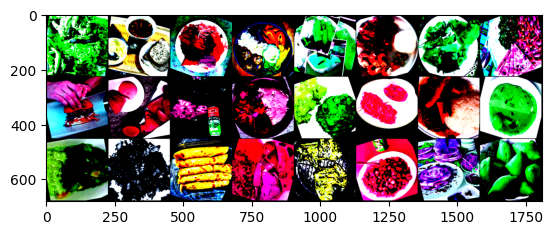

In [19]:
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(train_loader))
print(len(inputs))
# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, )

## <font style="color:green">2. Configuration [5 Points]</font>

**Define your configuration here.**

For example:


```python
@dataclass
class TrainingConfiguration:
    '''
    Describes configuration of the training process
    '''
    batch_size: int = 10
    epochs_count: int = 50  
    init_learning_rate: float = 0.1  # initial learning rate for lr scheduler
    log_interval: int = 5  
    test_interval: int = 1  
    data_root: str = "/kaggle/input/opencv-pytorch-classification-project-2/"
    num_workers: int = 2  
    device: str = 'cuda'  
    
```

In [20]:
def system_config(SEED_VALUE = 42):

    random.seed(SEED_VALUE)
    np.random.seed(SEED_VALUE)
    torch.manual_seed(SEED_VALUE)

    if torch.cuda.is_available():
        device = torch.device('cuda')

        GPU_AVAILABLE = True

        torch.cuda.manual_seed(SEED_VALUE)
        torch.cuda.manual_seed_all(SEED_VALUE)

         # Performance and deterministic behavior.
        torch.backends.cudnn.enabled = True       # Provides highly optimized primitives for DL operations.
        torch.backends.cudnn.deterministic = True # Insures deterministic even when above cudnn is enabled.
        torch.backends.cudnn.benchmark = False    # Setting to True can cause non-deterministic behavior.
    else:
        device = torch.device('cpu')

        GPU_AVAILABLE = False
        torch.use_deterministic_algorithms(True)


    return str(device), GPU_AVAILABLE

In [21]:
device , GPU_available = system_config()
print(device)
print(GPU_available)

cuda
True


In [22]:
@dataclass
class StandardConfig:
    BATCH_SIZE:           int = 16
   # IMG_SHAPE:          tuple = (256,256)
    NUM_CLASSES:          int = 13
    EPOCHS:               int = 70
    DATA_ROOT:            str = "/kaggle/input/opencv-pytorch-classification-project-2"
    NUM_WORKERS:          int = 4
    LEARNING_RATE: float = 5e-4


In [23]:
#weights = models.ConvNeXt_Large_Weights.DEFAULT
weights = models.ConvNeXt_Large_Weights.DEFAULT

transforms = weights.transforms()
transforms

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

## <font style="color:green">3. Evaluation Metric [10 Points]</font>

**Define methods or classes that will be used in model evaluation. For example, accuracy, f1-score etc.**

Already done in TransferLearningwithResnet


Use MulticlassPrecision when each instance belongs to exactly one class out of multiple classes.
Use MultilabelPrecision when each instance can belong to multiple classes simultaneously.

## <font style="color:green">4. Train and Validation [5 Points]</font>


**Write the methods or classes to be used for training and validation.**

In [24]:
#Focal Loss implementation
from torch import Tensor
from typing import List
class FocalLoss(nn.Module):
  """useful for classification tasks when there is a large class imbalance.
    x is expected to contain raw, unnormalized scores for each class.
    y is expected to contain class labels.

    Shape:
        - x: (batch_size, C) or (batch_size, C, d1, d2, ..., dK), K > 0.
        - y: (batch_size,) or (batch_size, d1, d2, ..., dK), K > 0.
    """
  def __init__(self,
                 alpha: List[Tensor] = None,
                 gamma: float = 0.,
                 reduction: str = 'mean',
                 ignore_index: int = -100):

      super().__init__()

      if reduction not in ['mean', 'sum', 'none']:
        raise ValueError(
                  'Reduction must be one of: "mean", "sum", "none".')
      self.alpha = alpha
      self.alpha = self.alpha.to(device)
      self.gamma = gamma
      self.reduction = reduction

  def forward(self,pred,target):
      ce_loss = F.cross_entropy(pred, target, reduction = 'none')
      pt = torch.exp(-ce_loss)
      loss = self.alpha[target] * (1-pt) ** self.gamma * ce_loss  #ce = -log(pt)
      if self.reduction == 'mean':
              loss = loss.mean()
      elif self.reduction == 'sum':
              loss = loss.sum()
      return loss




In [25]:
import numpy as np
def class_weight(train_labels):
    class_counts = np.bincount(train_labels)
    num_classes = len(class_counts)
    total_samples = len(train_labels)

    class_weights = []
    for count in class_counts:
        weight = 1 / (count / total_samples)
        class_weights.append(weight)
    return class_weights
alpha = class_weight(train_df["class"])
#alpha is inverse of class frequency

In [27]:
class TransferLearningwithConvNext(pl.LightningModule):
    def __init__(self,learning_rate,
                model_name = "FoodClassification",
                 pretrained = True,
              #   finetune_start = 1,
                 num_classes = 13,
                 criterion = None
                ):
        super().__init__()
        self.save_hyperparameters()

        self.model = get_convnext_large(self.hparams.num_classes)
     #   model2 = get_swin_t(self.hparams.num_classes)
     #   self.model = EnsembleModel(model1,model2,self.hparams.num_classes)

        #initialize evaluation metrics
        self.mean_train_loss = MeanMetric()
        self.train_acc  = MulticlassAccuracy(num_classes = self.hparams.num_classes, average = 'weighted')

        self.mean_valid_loss = MeanMetric()
        self.valid_accuracy  = MulticlassAccuracy(num_classes = self.hparams.num_classes, average = 'weighted')

        self.valid_precision = MulticlassPrecision(num_classes = self.hparams.num_classes, average = 'weighted')
        self.valid_recall = MulticlassRecall(num_classes = self.hparams.num_classes, average = 'weighted')
        self.valid_f1_score = MulticlassF1Score(num_classes=self.hparams.num_classes,average='weighted')

        # for tracking best so far validation accuracy
        self.val_acc_best = MaxMetric()

    def forward(self,x):
        return self.model(x)

    def _shared_step(self,data,target):
        #get prediction
        output = self(data)

        #calculate loss
       # loss = F.cross_entropy(output,target)
        loss = self.hparams.criterion(output,target)

        #get probability score using softmax
        prob = F.softmax(output,dim = 1)

        #get index of maximum probability
        pred_batch = output.detach().argmax(dim=1)

        return loss, pred_batch


    def training_step(self,batch,batch_idx, *args, **kwargs):

        #get data and labels from batch
        data,target = batch
        # updated_train_class_counts = target.value_counts()
        # total =sum(updated_train_class_counts)
        # class_weights = [total/count for count in updated_train_class_counts]
        # class_weights_tensor = torch.tensor(class_weights, dtype = torch.float)

        loss, pred = self._shared_step(data,target)
        #print(pred)

        #calculate and accumulate running batch evaluation metrics
        # The weight parameter is used in case the batch dimension differs.
        weight = data.shape[0]
        self.mean_train_loss(loss,weight = weight)
        self.train_acc(pred,target)


        #log metrics to a logger(default: tensorboard)
        self.log("train/loss" , self.mean_train_loss, on_step = True,on_epoch = True,prog_bar = True)
        self.log("train/accuracy", self.train_acc, on_step = True, on_epoch = True,prog_bar = True)

        return loss

    def on_train_epoch_end(self):
         # Computing and logging the training mean loss & mean accuracy.
#         self.log("train/loss", self.mean_train_loss, on_epoch = True,prog_bar=True)
#         self.log("train/acc",  self.train_acc,  on_epoch = True,   prog_bar=True)

        self.log("step", self.current_epoch) # Set X-axis as epoch number for epoch-level metrics

    def validation_step(self,batch,batch_idx, *args, **kwargs):

        #get data and labels from batch
        data,target = batch
        loss, pred = self._shared_step(data,target)

        #calculate and accumulate running batch evaluation metrics
        # The weight parameter is used in case the batch dimension differs.
        weight = data.shape[0]
        self.mean_valid_loss(loss,weight = weight)

        self.valid_accuracy(pred,target)
        self.valid_precision(pred,target)
        self.valid_recall(pred,target)
        self.valid_f1_score(pred,target)


        #log metrics to a logger(default: tensorboard)
        self.log("valid/loss" , self.mean_valid_loss, on_step = True,on_epoch = True, prog_bar = True)
        self.log("valid/acc", self.valid_accuracy, on_step = True, on_epoch = True, prog_bar = True)
        self.log("valid/precision", self.valid_precision,on_step = False, on_epoch = True, prog_bar = False)
        self.log("valid/recall", self.valid_recall, on_step = False,on_epoch = True, prog_bar = False)
        self.log("valid/train_f1_score", self.valid_f1_score,on_step = False, on_epoch = True, prog_bar = False)

    def on_validation_epoch_end(self):


        acc = self.valid_accuracy.compute()  # get current val acc
        self.val_acc_best(acc)  # update best so far val acc
        # log `val_acc_best` as a value through `.compute()` method, instead of as a metric object
        # otherwise metric would be reset by lightning after each epoch
        self.log("val/acc_best", self.val_acc_best.compute(), on_step=False, on_epoch=True, prog_bar=True)
        self.log("step", self.current_epoch) # Set X-axis as epoch number for epoch-level metrics



    def predict_step(self,batch):
        data = batch
        output =  self(data)
        prob = F.softmax(output,dim = 1)
        pred = torch.argmax(prob,dim = 1)
        return pred
    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.hparams.learning_rate)



## <font style="color:green">5. Model [5 Points]</font>

**Define your model in this section.**

**You are allowed to use any pre-trained model.**

In [28]:
class EnsembleModel(nn.Module):
    def __init__(self,model1,model2,num_classes):
        super().__init__()
        self.model1 = model1
        self.model2 = model2
        self.classifier = nn.Linear(2*num_classes,num_classes)
        
        
    def forward(self,x):
        x1 = self.model1(x)
        x2 = self.model2(x)
       # print(x1.shape)
       # print(x2.shape)
        x = torch.cat((x1,x2),dim = 1)
       # print(x.shape)
        out = self.classifier(x)
        return out
    

In [29]:
def get_convnext_large(num_classes):
  model = models.convnext_large(weights = models.ConvNeXt_Large_Weights.IMAGENET1K_V1)
  for param in model.parameters():
            param.requires_grad = False
  for param in model.features[7][1].parameters():
            param.requires_grad = True

  for param in model.features[7][2].parameters():
            param.requires_grad = True

  num_features = model.classifier[-1].in_features
  model.classifier = nn.Sequential(
      nn.Flatten(start_dim=1)  ,
      nn.LayerNorm(num_features),
      nn.ReLU(),
      nn.BatchNorm1d(num_features),
      nn.Linear(num_features, num_classes)

  )

  return model



In [30]:
def get_swin_t(num_classes):
  model = models.swin_v2_t(weights = models.Swin_V2_T_Weights.DEFAULT)
  for param in model.parameters():
            param.requires_grad = False
  for param in model.features[7][1].parameters():
            param.requires_grad = True

  num_features = model.head.in_features
  model.head = nn.Linear(num_features, num_classes)
  return model

## <font style="color:green">6. Utils [5 Points]</font>

**Define those methods or classes, which have  not been covered in the above sections.**

In [31]:
classes = {
         'chapati':0,
         'nyamachoma':1,
         'bhaji':2,
         'mandazi':3,
         'ugali': 4,
         'githeri':5,
         'kachumbari':6,
         'matoke':7,
         'masalachips':8,
         'sukumawiki':9,
         'pilau':10,
         'mukimo':11,
         'kukuchoma':12
         }

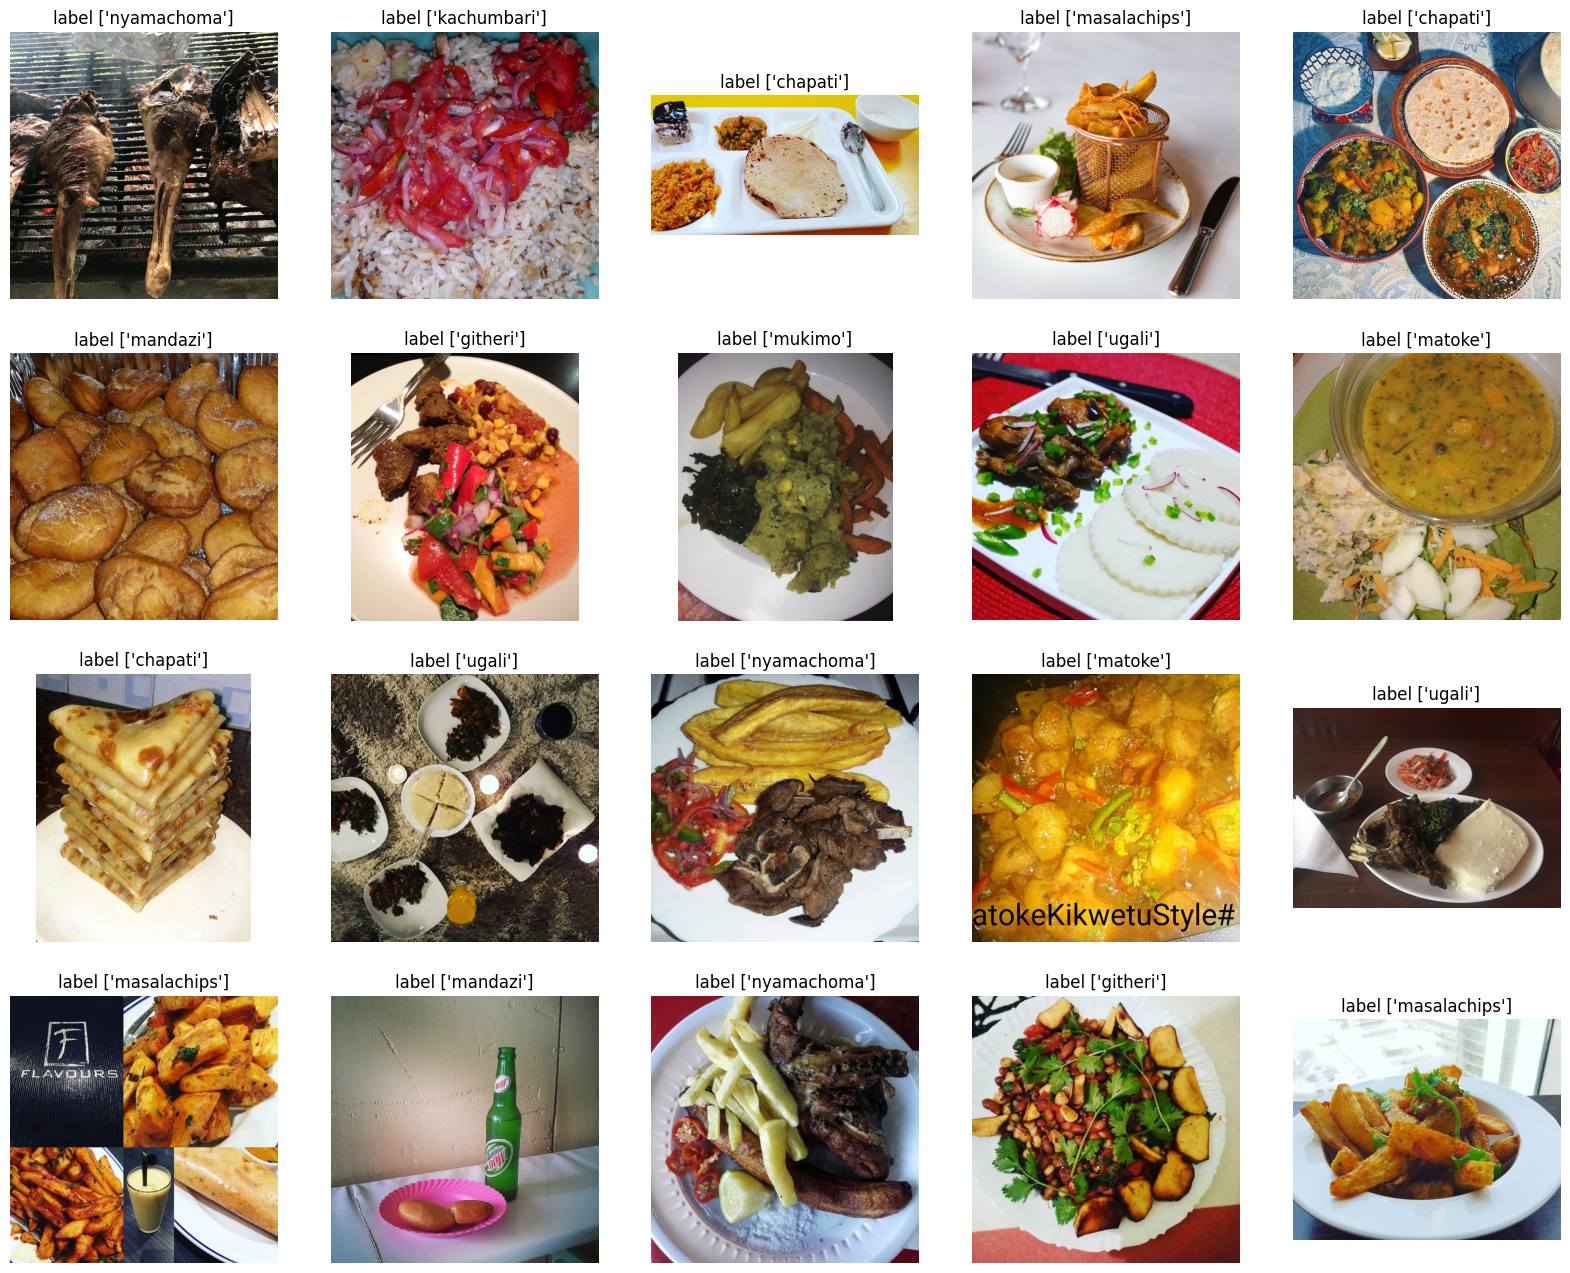

In [32]:
def visualization(df , index):
    id = str(df.iloc[index]['id'])
    label = df.iloc[index]['class']
    label = [id for id, name in classes.items() if name == label]
    image_path = os.path.join(data_root,"images","images",id+".jpg")
    image = Image.open(image_path)#.convert("RGB")
    return image,label


fig, axs = plt.subplots(4, 5, figsize=(20, 16))
for idx, ax in zip(np.arange(20), axs.flatten()):
    image,label = visualization(train_df, idx)
    ax.imshow(image)
    ax.set_title(f'label {label}')
    ax.axis('off')


plt.show()

In [33]:
%reload_ext tensorboard
%tensorboard --logdir=lightning_logs/

## <font style="color:green">7. Experiment [5 Points]</font>

**Choose your optimizer and LR-scheduler and use the above methods and classes to train your model.**

In [34]:
def training_validation(*,
                       batch_size,
                       epochs,
                        init_lr,
                      ##  max_lr,
                        data_root,
                        num_classes,
                        num_workers,
                        alpha):

    pl.seed_everything(42, workers = True)
    alpha = alpha
    if not isinstance(alpha, Tensor):
                alpha = torch.tensor(alpha)
    criterion = FocalLoss(alpha = alpha,gamma = 2, reduction = 'mean')

    model = TransferLearningwithConvNext(learning_rate = init_lr,num_classes = num_classes,criterion = criterion)


    data_module = dataModule(data_root = data_root, batch_size = batch_size, num_workers = num_workers)



    # Creating ModelCheckpoint callback.
    # Checkpoints by default will be saved in Trainer - default_root_dir which is "lightning_logs".
    model_checkpoint = ModelCheckpoint(monitor = 'valid/acc',
                                      mode = 'max',
                                      filename = 'FT_Food_classify_Data_checkpoints_{epoch:03d}',
                                      auto_insert_metric_name = False,
                                      save_weights_only=True,)

    # Creating a learning rate monitor callback which will be plotted/added in the default logger.
    lr_monitor = LearningRateMonitor(logging_interval = "step")

   # early_stopping_callback = EarlyStopping(monitor="valid/loss")

    # Initializing the Trainer class object.
    # It uses 'Tensorboard' as its default logger.
    try:
        trainer = pl.Trainer(accelerator = "auto",
                             devices = "auto",
                             strategy="auto",
                             max_epochs = epochs,
                             precision = "16-mixed",
                             deterministic = True, #for deterministic and reproducible training
                             callbacks=[                 # Declaring callbacks to use.
                                    #    EarlyStopping(monitor="valid/loss",patience= 8 ),
                                        model_checkpoint,
                                        lr_monitor,
                                      #  early_stopping_callback
                                        ],
                             log_every_n_steps=1,
                            )
        trainer.fit(model,data_module)
    except KeyboardInterrupt:
        print("Training interrupted.")



    return model, data_module, model_checkpoint.best_model_path

In [35]:

from torchvision import transforms

model, data_module, best_ckpt_path, = training_validation(
                                            batch_size  = StandardConfig.BATCH_SIZE,
                                            epochs      = StandardConfig.EPOCHS,
                                            init_lr     = StandardConfig.LEARNING_RATE,
                                          #  max_lr      = StandardConfig.MAX_LEARNING_RATE,
                                            data_root   = StandardConfig.DATA_ROOT,
                                            num_classes = StandardConfig.NUM_CLASSES,

                                            num_workers = StandardConfig.NUM_WORKERS,
                                            alpha = alpha

                                     )

Downloading: "https://download.pytorch.org/models/convnext_large-ea097f82.pth" to /root/.cache/torch/hub/checkpoints/convnext_large-ea097f82.pth
100%|██████████| 755M/755M [00:08<00:00, 94.2MB/s] 
2024-05-04 14:44:18.097095: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-04 14:44:18.097150: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-04 14:44:18.098403: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [36]:
#load test dataset
path = os.path.join(data_root, "test.csv")
test_df = pd.read_csv(path)
test_df.head()

id
0  9156739011499789258
1  2049465964503133373
2  6446998501027132988
3  4194396063119815321
4  9018117998187006009

In [37]:
CKPT_PATH = best_ckpt_path

trained_model = TransferLearningwithConvNext.load_from_checkpoint(checkpoint_path=CKPT_PATH)
trained_model.eval()


TransferLearningwithConvNext(
  (model): ConvNeXt(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 192, kernel_size=(4, 4), stride=(4, 4))
        (1): LayerNorm2d((192,), eps=1e-06, elementwise_affine=True)
      )
      (1): Sequential(
        (0): CNBlock(
          (block): Sequential(
            (0): Conv2d(192, 192, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=192)
            (1): Permute()
            (2): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
            (3): Linear(in_features=192, out_features=768, bias=True)
            (4): GELU(approximate='none')
            (5): Linear(in_features=768, out_features=192, bias=True)
            (6): Permute()
          )
          (stochastic_depth): StochasticDepth(p=0.0, mode=row)
        )
        (1): CNBlock(
          (block): Sequential(
            (0): Conv2d(192, 192, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=192)
            (1): Permute()
      

In [38]:
preprocess = transforms.Compose(
                [
                    transforms.Resize(size = (224,224)),#,interpolation=transforms.InterpolationMode.BILINEAR),
                  #  transforms.CenterCrop(224),
                    transforms.ToTensor(),
                    transforms.Normalize(mean, std)
                ]
            )


In [39]:

class testDataset(Dataset):
    def __init__(self,data_root, df,transform = None):

          # set transform attribute
        self.transform = transform

        num_classes = 13

        self.df = df

    def __len__(self):
        return len(self.df)

    def __getitem__(self,index):
        "returns images with resize and preprocessing"

        id = str(self.df.iloc[index]['id'])
        image_path = os.path.join(data_root,"images","images",id+".jpg")
        image = Image.open(image_path).convert("RGB")

        if self.transform is not None:
            image = self.transform(image)

        return image






In [40]:

dataset = testDataset(data_root,df = test_df, transform = preprocess)

test_dataloader = DataLoader(dataset, shuffle = False, batch_size = 1)

In [41]:
trainer = Trainer()
results = trainer.predict(model = trained_model, dataloaders = test_dataloader)

Predicting: |          | 0/? [00:00<?, ?it/s]

In [42]:
#print(results)
labels = []
for label in results:
        label = [id for id, name in classes.items() if name == label]

        labels.append((label[0]))
#labels

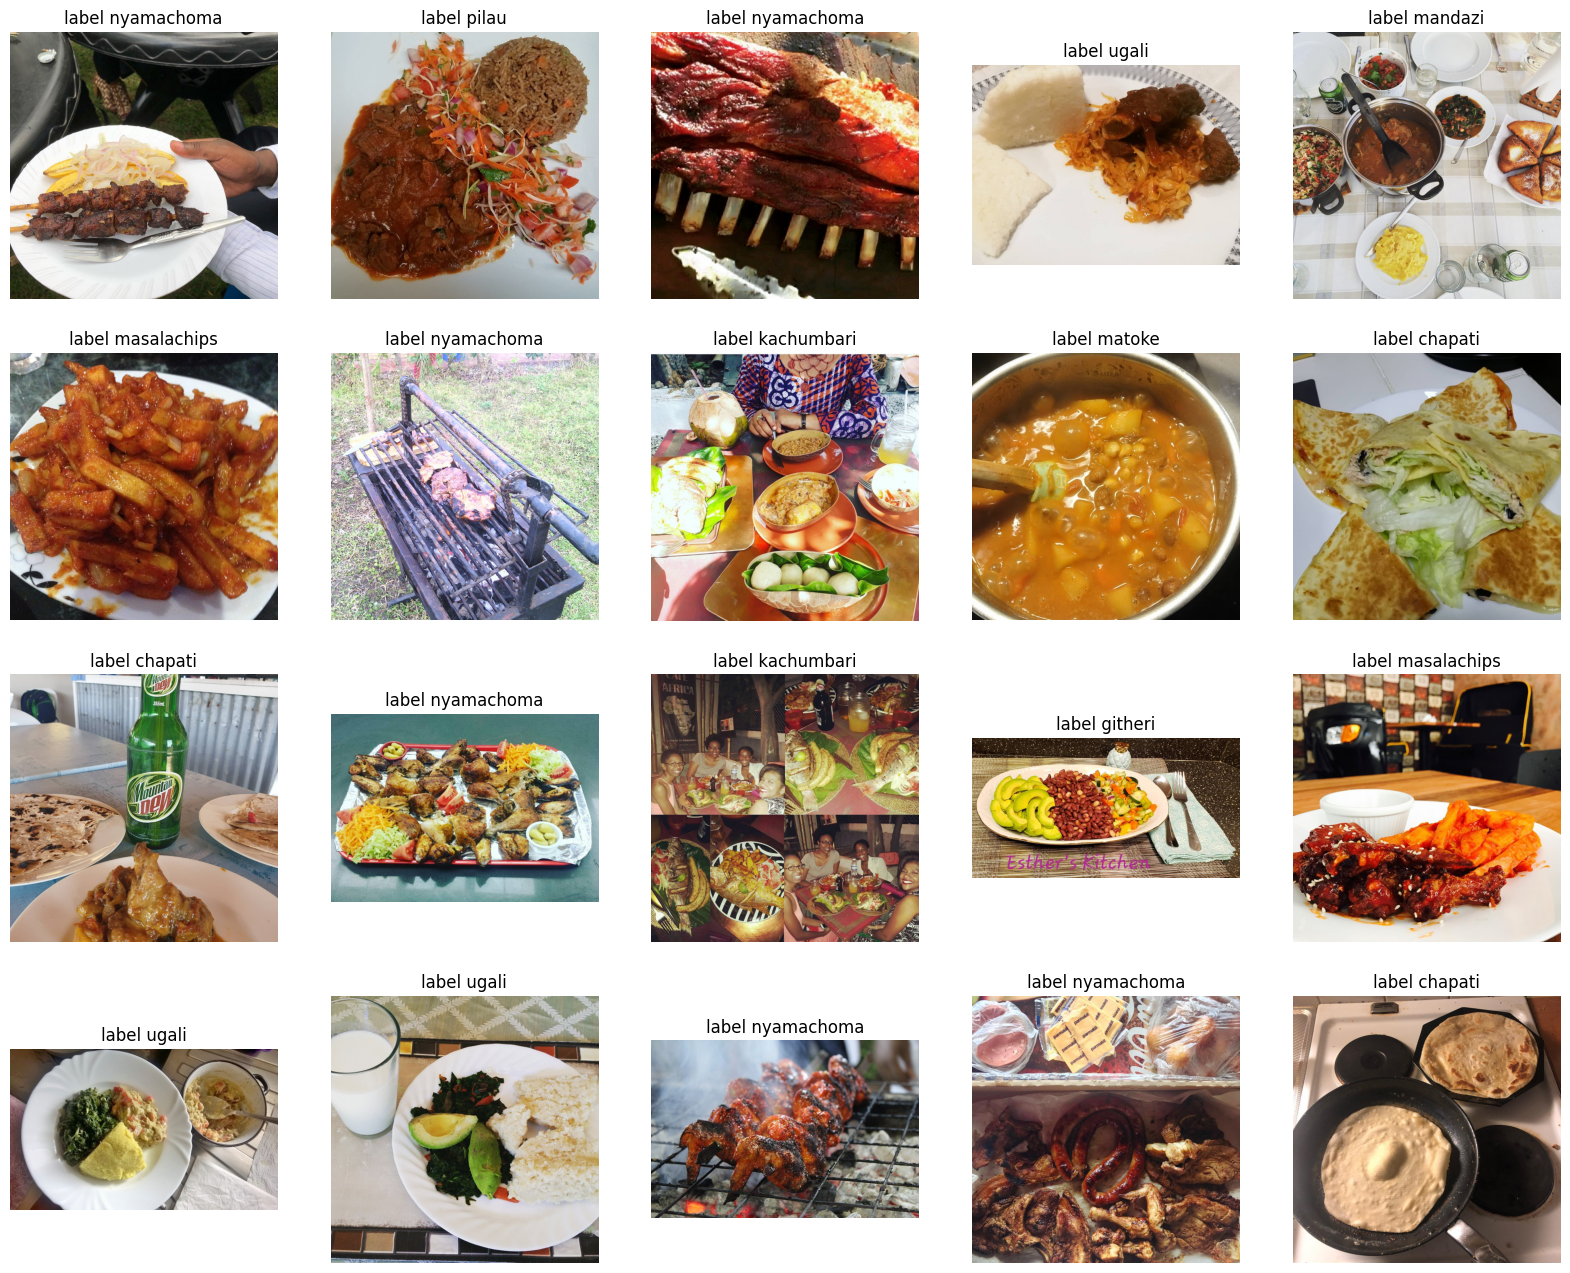

In [43]:
def visualization(df , index):
    id = str(df.iloc[index]['id'])
#     label = df.iloc[index]['class']
#     label = [id for id, name in classes.items() if name == label]
    image_path = os.path.join(data_root,"images","images",id+".jpg")
    image = Image.open(image_path)#.convert("RGB")
    return image


fig, axs = plt.subplots(4, 5, figsize=(20, 16))
for idx, ax in zip(np.arange(20), axs.flatten()):
    image = visualization(test_df, idx)
    ax.imshow(image)
    ax.set_title(f'label {labels[idx]}')
    ax.axis('off')


plt.show()

In [44]:
data = {
    "id" : test_df["id"],
    "class": (labels)
}

In [45]:
submission = pd.DataFrame(data)

In [46]:
submission

id       class
0      9156739011499789258  nyamachoma
1      2049465964503133373       pilau
2      6446998501027132988  nyamachoma
3      4194396063119815321       ugali
4      9018117998187006009     mandazi
...                    ...         ...
1633  18302448610371772604     githeri
1634  15920672464676076400     chapati
1635   3232020170382870007     chapati
1636   3094804487341098468  kachumbari
1637   5827342261332058667       ugali

[1638 rows x 2 columns]

In [47]:
submission.to_csv('submission_file_cn_new.csv', index=False)

In [48]:
import os
for dirname, _, filenames in os.walk('/kaggle/working'):
   # print(filenames)
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/working/submission_file_cn_new.csv
/kaggle/working/lightning_logs/version_0/events.out.tfevents.1714833860.0e8de59271e5.34.0
/kaggle/working/lightning_logs/version_0/hparams.yaml
/kaggle/working/lightning_logs/version_0/checkpoints/FT_Food_classify_Data_checkpoints_062.ckpt
/kaggle/working/lightning_logs/version_1/events.out.tfevents.1714853907.0e8de59271e5.34.1
/kaggle/working/lightning_logs/version_1/hparams.yaml


In [49]:
%cd /kaggle/working
from IPython.display import FileLink
FileLink('submission_file_cn_new.csv')

/kaggle/working


/kaggle/working/submission_file_cn_new.csv

In [54]:
%cd /kaggle/working
from IPython.display import FileLink
display(FileLink('lightning_logs/version_0/events.out.tfevents.1714833860.0e8de59271e5.34.0'))
display(FileLink('lightning_logs/version_0/hparams.yaml'))
display(FileLink('lightning_logs/version_0/checkpoints/FT_Food_classify_Data_checkpoints_062.ckpt'))



/kaggle/working


/kaggle/working/lightning_logs/version_0/events.out.tfevents.1714833860.0e8de59271e5.34.0

/kaggle/working/lightning_logs/version_0/hparams.yaml

/kaggle/working/lightning_logs/version_0/checkpoints/FT_Food_classify_Data_checkpoints_062.ckpt

In [55]:
logs_dir = 'lightning_logs/version_1'

file_list = os.listdir(logs_dir)
file_list
for file_name in file_list:
    file_path = os.path.join(logs_dir, file_name)
    display(FileLink(file_path))



/kaggle/working/lightning_logs/version_1/events.out.tfevents.1714853907.0e8de59271e5.34.1

/kaggle/working/lightning_logs/version_1/hparams.yaml

## <font style="color:green">8. TensorBoard Dev Scalars Log Link [5 Points]</font>

**Share your TensorBoard scalars logs link here You can also share (not mandatory) your GitHub link, if you have pushed this project in GitHub.**


For example, [Find Project2 logs here](https://tensorboard.dev/experiment/kMJ4YU0wSNG0IkjrluQ5Dg/#scalars).

In [52]:
#%load_ext tensorboard
%reload_ext tensorboard

# %tensorboard --logdir={logdir}
# # # To reload tensorBoard
# %reload_ext tensorboard

# logs folder path
%tensorboard --logdir=lightning_logs

## <font style="color:green">9. Kaggle Profile Link [50 Points]</font>

**Share your Kaggle profile link  with us here to score , points in  the competition.**

**For full points, you need a minimum accuracy of `75%` on the test data. If accuracy is less than `70%`, you gain  no points for this section.**


**Submit `submission.csv` (prediction for images in `test.csv`), in the `Submit Predictions` tab in Kaggle, to get evaluated for  this section.**

Username : smruthisreenivas
